**IMPORTING LIBRARIES**

In [167]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import seaborn as sns

In [168]:
import warnings
warnings.filterwarnings("ignore")  #to avoid printing warnings 

**DATA EXTRACTION**

In [169]:
dataset = pd.read_csv("data.csv",header = 0) #read csv files
dataset.head() #read top 5 rows

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [170]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

**DATA PREPARATION**

In [171]:
dataset.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [172]:
#dropping unnecessary data from dataset
dataset.drop('ReasonsForLack',axis=1,inplace=True)  


In [173]:
dataset.describe()  #getting an overview of dataset

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.753425,3.351598,3.621005,3.589041,3.721461,3.908676,3.575342,3.561644,0.415525
std,1.289842,0.995234,1.152467,1.110859,1.053629,1.023068,1.120098,1.100287,0.493941
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,20.000000,4.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,1.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [174]:
# size of the dataframe
len(dataset)

219

In [175]:
#finding unique values of 'y' column of dataset
dataset.y.unique()

array([1, 0])

In [176]:
dataset.IndividualProject.unique()

array(['No', 'Yes'], dtype=object)

In [177]:
dataset.City.unique()

array(['Yes', 'No'], dtype=object)

In [178]:
dataset.Influenced.unique()

array(['No', 'Yes'], dtype=object)

In [179]:
dataset.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [180]:
dataset.MentalDisorder.unique()

array(['Yes', 'No'], dtype=object)

In [181]:
dataset.KeyTraits.unique()

array(['Passion', 'Vision', 'Resilience', 'Positivity', 'Work Ethic'],
      dtype=object)

In [182]:
# encoding IndividualProject', 'Gender', 'City', 'Influenced','MentalDisorder'
dataset['IndividualProject'] = dataset['IndividualProject'].map({'Yes':1,'No':0}) 
dataset['City'] = dataset['City'].map({'Yes':1,'No':0}) 
dataset['Influenced'] = dataset['Influenced'].map({'Yes':1,'No':0}) 
dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0}) 
dataset['MentalDisorder'] = dataset['MentalDisorder'].map({'Yes':1,'No':0}) 
dataset['KeyTraits'] = dataset['KeyTraits'].map({'Passion':0, 'Vision':1, 'Resilience':2, 'Positivity':3, 'Work Ethic': 4})

In [183]:
dataset.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,Engineering Sciences,0,19,1,1,0,2,2,3,3,2,2,3,1,0,1
1,Engineering Sciences,1,22,1,0,1,3,3,3,4,4,3,4,1,1,0
2,Engineering Sciences,0,18,1,1,0,3,4,3,3,3,4,4,0,0,0
3,Engineering Sciences,1,20,1,1,1,3,3,3,3,4,3,3,0,2,0
4,Engineering Sciences,1,19,1,1,1,2,3,3,3,4,3,2,1,1,1


**DATA EXPLORATION**

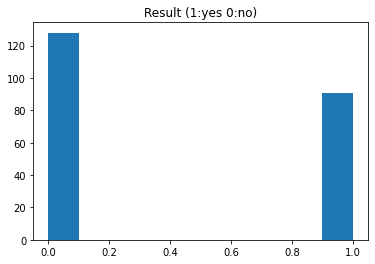

In [184]:
plt.hist(dataset['y'])
plt.title('Result (1:yes 0:no)')
plt.show() #plotting a histogram 

In [185]:
# features to be used for prediction
features_mean=list(dataset.columns[1:15])
datasety=dataset[dataset['y'] ==1]
datasetn=dataset[dataset['y'] ==0]
features_mean

['IndividualProject',
 'Age',
 'Gender',
 'City',
 'Influenced',
 'Perseverance',
 'DesireToTakeInitiative',
 'Competitiveness',
 'SelfReliance',
 'StrongNeedToAchieve',
 'SelfConfidence',
 'GoodPhysicalHealth',
 'MentalDisorder',
 'KeyTraits']

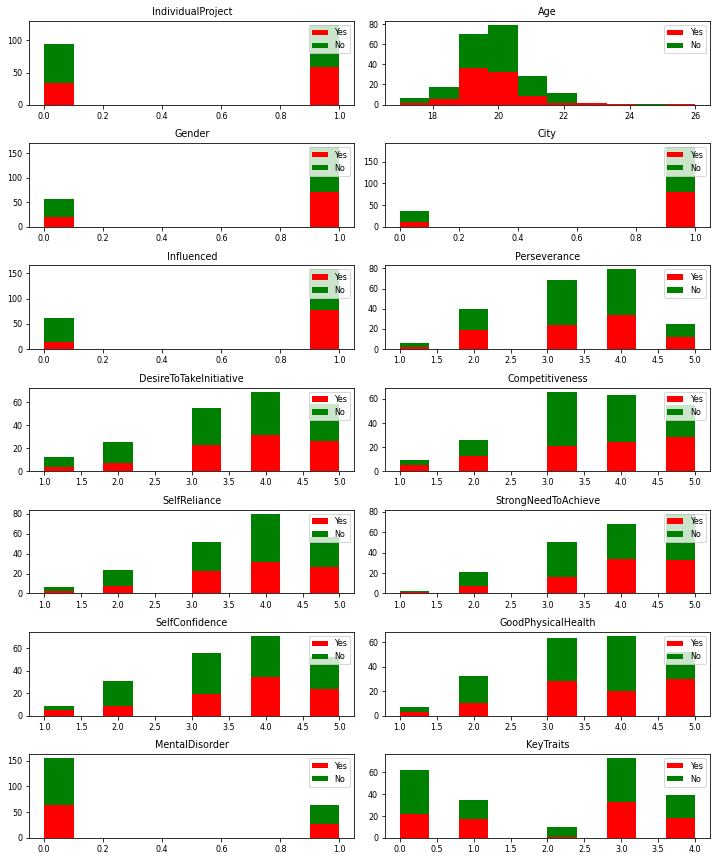

In [186]:
#Plotting histogram for all features from both datasetM and datasetB
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,12))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    binwidth= (max(dataset[features_mean[idx]]) - min(dataset[features_mean[idx]]))/50
    ax.hist([datasety[features_mean[idx]],datasetn[features_mean[idx]]],stacked=True,label=['Yes','No'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [187]:
dataset.EducationSector.unique()

array(['Engineering Sciences', 'Others',
       'Economic Sciences, Business Studies, Commerce and Law',
       'Art, Music or Design', 'Humanities and Social Sciences',
       'Medicine, Health Sciences', 'Teaching Degree (e.g., B.Ed)',
       'Mathematics or Natural Sciences', 'Language and Cultural Studies'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

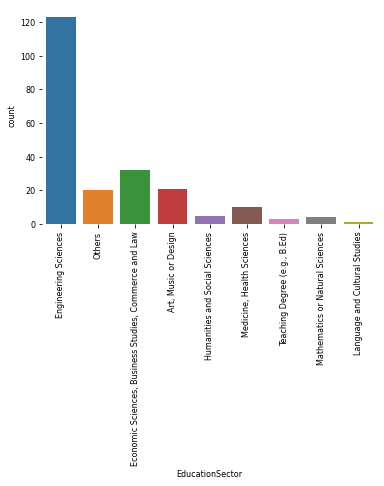

In [188]:
sns.countplot(dataset.EducationSector)
sns.despine(left=True,bottom=True)
plt.xticks(rotation = 90)

**MODELING**

In [189]:
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt


In [190]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [191]:
X = dataset.drop(['y','EducationSector'],axis=1)
Y = dataset['y']

In [192]:
#Building train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.6)

**LOGISTIC REGRESSION**

In [193]:
model=LogisticRegression()      # Logistic regression
model.fit(x_train,y_train)

LogisticRegression()

In [194]:
pre1 = model.predict(x_test)

In [195]:
mt.accuracy_score(y_test,pre1)

0.5833333333333334

**SVC**

In [196]:
model2 = SVC()        # SVC
model2.fit(x_train,y_train)

SVC()

In [197]:
pre2 = model2.predict(x_test)

In [198]:
mt.accuracy_score(y_test,pre2)

0.5833333333333334

**DECISION TREE CLASSIFIER**

In [199]:
model3 = DecisionTreeClassifier()          # DecisionTreeClassifier
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [200]:
pre3 = model3.predict(x_test)

In [201]:
mt.accuracy_score(y_test,pre3)

0.5757575757575758

**RANDOM FOREST CLASSIFIER**

In [202]:
model4 = RandomForestClassifier(n_estimators=500,criterion='entropy')  # RandomForestClassifier
model4.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [203]:
pre4 = model4.predict(x_test)

In [204]:
mt.accuracy_score(y_test,pre4)

0.6893939393939394

####Comparing All above algorithms Random Forest Classifier is more accurate.